In [1]:
import numpy
from numpy import linspace
from scipy.integrate import odeint
from scipy.stats import linregress 
import matplotlib.pyplot as plt
%matplotlib inline

$$A + B \to C + D$$

|Symbol|Chemical|
|---|---|
|A|ethyl acetate|
|B|sodium hydroxide|
|C|sodium acetate|
|D|ethanol|


In [2]:
CAo = 0.04 #mol/L
CBo = 0.02 #mol/L (the limiting reagent)
CCo = 0.00 #mol/L
CDo = 0.00 #mol/L
V = 0.2 #L
NAo = CAo*V
NBo = CBo*V
NCo = CCo*V
NDo = CDo*V



In [3]:
import pandas, array

In [4]:
kbatch = numpy.array(pandas.read_excel('kbatch.xlsx'))
kbatch[0,1] #testing 

9.943412

In [5]:
kbatchexp = kbatch[:,1]
kbatchexp #test

array([9.943412, 9.957992, 9.972571, ..., 3.83457 , 3.863729, 3.84915 ])

In [6]:
Kstart = 5.54 #from B solution conductivity testing
Kfinal = 3.85 #average of last k readings

In [7]:
tTot = len(kbatch)
tTot #test

1458

In [19]:
def conversion(K):
    X = []
    n = tTot
    for i in range(n):
        conv = abs((Kstart-K[i])/(Kstart - Kfinal))
        X.append(conv)
        i += 1
    return(X)


In [20]:
te = linspace(0,tTot,tTot)

In [22]:
XBexp = conversion(kbatchexp)
XBexp

[2.605569230769231,
 2.6141964497041426,
 2.622823076923077,
 2.6141964497041426,
 2.6141964497041426,
 2.6141964497041426,
 2.605569230769231,
 2.5969420118343196,
 2.622823076923077,
 2.6141964497041426,
 2.605569230769231,
 2.3985218934911248,
 1.587586982248521,
 0.4315733727810649,
 0.31942307692307664,
 0.31079585798816567,
 0.2676609467455619,
 0.13825680473372756,
 0.5432739644970415,
 1.267939053254438,
 1.3887165680473375,
 1.4145976331360948,
 1.4232242603550296,
 1.449105325443787,
 0.10329822485207088,
 0.3453035502958579,
 0.0864946745562128,
 0.3879881656804736,
 0.29354201183431955,
 0.37981183431952653,
 0.37118461538461556,
 0.37981183431952653,
 0.37118461538461556,
 0.37118461538461556,
 0.37981183431952653,
 0.3625579881656804,
 0.37118461538461556,
 0.37118461538461556,
 0.37118461538461556,
 0.3453035502958579,
 0.3625579881656804,
 0.3453035502958579,
 0.3453035502958579,
 0.35393076923076944,
 0.3280497041420118,
 0.3453035502958579,
 0.3280497041420118,
 0.319

In [23]:
k = 0.5
n = 1
m = 1

CA = 0.04mL/m3 - XB*CBo  (1:1 stoichiometry);
CA = CAo - XB*CBo;
CB = CBo*(1 - XB)


In [24]:
tspan = linspace(0,1500,1500)

In [25]:
def batchdiff(x,t):
    if x >= 0:
        rA = -k*(((CAo - x*CBo)**m)*((CBo - x*CBo)**n))
        rB = rA
        dCBdt = rB
    else:
        dCBdt = 0
        
    return(dCBdt) 

In [26]:
CB = odeint(batchdiff,0,tspan)
XB = (CBo - CB)/CBo
#XB = odeint(batchdiff, 0, tspan)

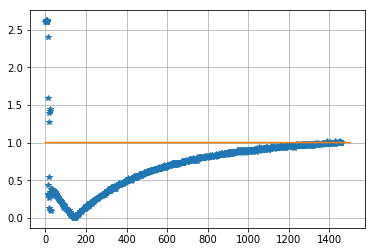

In [28]:
plt.figure(1)
plt.plot(te,XBexp, '*')
plt.plot(tspan,XB)

plt.grid()
plt.show()